In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Import
master_df = pd.read_csv('track_master_df.csv')

df = pd.read_csv('track_master_df.csv')

# Use only the numerical data
features = df.columns[4:]
df_num = df[features].copy().drop(columns = 'duration_ms')

In [3]:
replace = [('time_signature', list(range(0,6))), ('mode', [0,1]), ('key', list(range(1,12)))]


for col in replace:
    cat_dtype = pd.api.types.CategoricalDtype(categories=col[1], ordered=False)
    df_num[col[0]] = master_df[col[0]].astype(cat_dtype)

    df_num = pd.concat([df_num,pd.get_dummies(df_num[col[0]], prefix=col[0])],axis=1)
    df_num = df_num.drop(columns = col[0])

df_num.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature_0,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.511,0.472,-9.277,0.0910,0.534,0.614,0.1100,0.0399,127.978,0,...,0,0,1,0,0,0,0,0,0,0
1,0.742,0.546,-7.694,0.0315,0.172,0.380,0.1150,0.8680,104.996,0,...,0,0,0,0,0,0,0,0,0,0
2,0.609,0.629,-5.024,0.0264,0.425,0.000,0.0978,0.3250,99.955,0,...,0,0,0,0,0,0,0,0,1,0
3,0.730,0.770,-5.114,0.0298,0.138,0.000,0.0473,0.5070,104.948,0,...,0,0,0,0,0,0,1,0,0,0
4,0.706,0.558,-7.237,0.0593,0.146,0.000,0.1180,0.2270,110.443,0,...,1,0,0,0,0,0,0,0,0,0


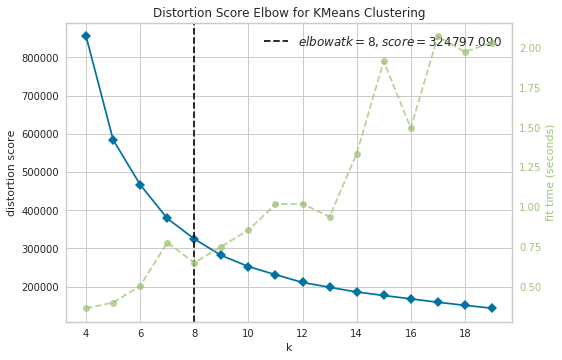

In [15]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(df_num)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [4]:
# Fit model
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_num)

# Create labels
labels = kmeans.labels_

# Append cluster labels to dataframe
new_series = pd.Series(labels)
df_num['clusters'] = new_series.values

In [6]:
df_num.to_csv('cluster_master.csv', index = False)

In [ ]:
pd.read_csv('cluster_master.csv')

In [16]:
# Calculate each cluster's centroid
# centroids = df_num.groupby('clusters').mean()
# print(centroids)

# Specify X, y
X = df_num.drop(columns=['clusters'])
y = df_num['clusters']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)

# Train, val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)